In [82]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
data = ('/Users/Beba/Documents/JupyterNotebooks/NY2013Crimes.csv')
raw_crimes = pd.read_csv(data, skiprows=4)
raw_crimes.head(12)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0.0,NaN,3,4,16,223,53,165,5,NaN
5,Alfred Village,"4,089",5,0.0,NaN,0,3,2,46,10,36,0,NaN
6,Allegany Village,"1,781",3,0.0,NaN,0,0,3,10,0,10,0,0.0
7,Amherst Town,"118,296",107,1.0,NaN,7,31,68,"2,118",204,"1,882",32,3.0
8,Amityville Village,"9,519",9,0.0,NaN,2,4,3,210,16,188,6,1.0
9,Amsterdam,"18,182",30,0.0,NaN,0,12,18,405,99,291,15,0.0


In [5]:
Property_Crime = pd.DataFrame()

In [6]:
Property_Crime['City'] = raw_crimes['City']
Property_Crime['Population'] = raw_crimes['Population']
Property_Crime['Robbery'] = raw_crimes['Robbery']
Property_Crime['Murder'] = raw_crimes['Murder and\nnonnegligent\nmanslaughter']

In [7]:
Property_Crime['Population'] = Property_Crime['Population'].str.replace(',','').astype(float)

In [8]:
Property_Crime['PopulationSQ'] = Property_Crime['Population'].apply(lambda x: x*x)

In [13]:
Property_Crime.head()

,City,Population,Robbery,Murder,PopulationSQ
0,Adams Village,1861.0,0,0.0,3.463321e+06
1,Addison Town and Village,2577.0,0,0.0,6.640929e+06
2,Akron Village,2846.0,0,0.0,8.099716e+06
3,Albany,97956.0,227,8.0,9.595378e+09
4,Albion Village,6388.0,4,0.0,4.080654e+07


In [58]:
Property_Crime['Robbery'] = Property_Crime['Robbery'].astype(str)

In [73]:
Property_Crime.head()

,City,Population,PopulationSQ,Robbery_Category,Murder_Category
0,Adams Village,1861.0,3.463321e+06,0,0
1,Addison Town and Village,2577.0,6.640929e+06,0,0
2,Akron Village,2846.0,8.099716e+06,0,0
3,Albany,97956.0,9.595378e+09,1,1
4,Albion Village,6388.0,4.080654e+07,1,0


In [65]:
Property_Crime['Robbery_Category'] = np.where(Property_Crime['Robbery'].str.contains("0.0"), 0, 1)

In [68]:
Property_Crime['Murder'] = Property_Crime['Murder'].astype(str)
Property_Crime['Murder_Category'] = np.where(Property_Crime['Murder'].str.contains("0.0"), 0, 1)

In [72]:
Property_Crime.drop(['Robbery'], axis=1, inplace=True)
Property_Crime.drop(['Murder'], axis=1, inplace=True)

In [76]:
Property_Crime.describe()

,Population,PopulationSQ,Robbery_Category,Murder_Category
count,3.480000e+02,3.480000e+02,351.000000,351.000000
mean,4.003763e+04,2.035547e+11,0.575499,0.145299
std,4.500374e+05,3.778876e+12,0.494973,0.352905
min,5.260000e+02,2.766760e+05,0.000000,0.000000
25%,3.003000e+03,9.018117e+06,0.000000,0.000000
50%,7.233500e+03,5.232568e+07,1.000000,0.000000
75%,1.842750e+04,3.397536e+08,1.000000,0.000000
max,8.396126e+06,7.049493e+13,1.000000,1.000000


In [105]:
Property_Crime.head()

,City,Population,PopulationSQ,Robbery_Category,Murder_Category
0,Adams Village,1861.0,3.463321e+06,0,0
1,Addison Town and Village,2577.0,6.640929e+06,0,0
2,Akron Village,2846.0,8.099716e+06,0,0
3,Albany,97956.0,9.595378e+09,1,1
4,Albion Village,6388.0,4.080654e+07,1,0


In [114]:
#Property_Crime['Population'] = raw_crimes['Population']
#Property_Crime['Population'] = Property_Crime['Population'].astype(float)
#Property_Crime['PopulationSQ'] = Property_Crime['Population'].apply(lambda x: x*x)
raw_crimes.isnull().sum()

City                                        0
Population                                  0
Violent\ncrime                              0
Murder and\nnonnegligent\nmanslaughter      0
Rape\n(revised\ndefinition)1              348
Rape\n(legacy\ndefinition)2                 0
Robbery                                     0
Aggravated\nassault                         0
Property\ncrime                             0
Burglary                                    0
Larceny-\ntheft                             0
Motor\nvehicle\ntheft                       0
Arson3                                    161
dtype: int64

In [109]:
Property_Crime.dropna(subset = ['Population', 'PopulationSQ'], inplace=True)

In [113]:
raw_crimes.dropna(subset = ['Property\ncrime',
                            'Violent\ncrime',
                            'Robbery',
                            'Aggravated\nassault'], inplace=True)

^ Should have done this cleaning earlier. Dropping NA values.

In [132]:
# the actual regression

regr = linear_model.LinearRegression()

Y = raw_crimes['Property\ncrime'].values.reshape(-1, 1)
X = Property_Crime['Population'].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.35)
regr.fit(X_train, Y_train)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print(regr.score(X_train, Y_train))

Coefficients: 
 [[ 0.01692924]]
Intercept: 
 [ 104.60311546]
0.996070588588


I ran the last cell too many times and it over fit my data, giving me an R-squared score of .99 instead of the .77 it was when I ran it again after adding the score print out. 

In [122]:
Property_Crime['Robbery'] = raw_crimes['Robbery'].str.replace(',','').astype(float)

In [123]:
Property_Crime['Violent_Crime'] = raw_crimes['Violent\ncrime'].str.replace(',','').astype(float)

In [134]:
Y = raw_crimes['Property\ncrime'].values.reshape(-1, 1)
X2 = Property_Crime[['Population', 'Violent_Crime', 'Robbery']]
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y, test_size=.35)
regr.fit(X_train2, Y_train2)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print(regr.score(X_train2, Y_train2))

Coefficients: 
 [[ -3.97134712e-03  -1.24911761e+00   1.25560471e+01]]
Intercept: 
 [ 279.08209195]
0.997792949121


Ran this cell too many times too. :(

In [135]:
regr.fit(X_test, Y_test)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print(regr.score(X_test, Y_test))

Coefficients: 
 [[ 0.03334822]]
Intercept: 
 [-134.00035387]
0.774710784991


In [136]:
regr.fit(X_test2, Y_test2)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print(regr.score(X_test2, Y_test2))

Coefficients: 
 [[  0.018199     8.00187155 -14.86595314]]
Intercept: 
 [-44.04328289]
0.897712610453


Let's try some other columns.

In [156]:
X3 = Property_Crime[['Population', 'Murder', 'Rape', 'Assault']]
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y, test_size=.35)
regr.fit(X_train3, Y_train3)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print(regr.score(X_train3, Y_train3))

Coefficients: 
 [[  1.40083255e-02   1.03248204e+02   5.03714610e+01  -2.08589413e+00]]
Intercept: 
 [ 22.97565508]
0.99945396352


That score looks overfit. Test time!

In [158]:
regr.fit(X_test3, Y_test3)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print(regr.score(X_test3, Y_test3))

Coefficients: 
 [[  1.87848239e-02  -8.03781212e+01   3.35241378e+01   3.77433403e+00]]
Intercept: 
 [-56.35329515]
0.984011596357


In [147]:
Property_Crime['Murder'] = raw_crimes['Murder and\nnonnegligent\nmanslaughter']
Property_Crime['Rape'] = raw_crimes['Rape\n(legacy\ndefinition)2'].str.replace(',','').astype(float)
Property_Crime['Assault'] = raw_crimes['Aggravated\nassault'].str.replace(',','').astype(float)
Property_Crime['Burglary'] = raw_crimes['Burglary'].str.replace(',','').astype(float)
Property_Crime['Larceny'] = raw_crimes['Larceny-\ntheft'].str.replace(',','').astype(float)
Property_Crime['Motor_vehicle_theft'] = raw_crimes['Motor\nvehicle\ntheft'].str.replace(',','').astype(float)

Add new columns for new features, to test in the model. And maybe split it up into different sized cities and see if that affects it.

In [159]:
X4 = Property_Crime[['Population', 'Burglary', 'Larceny', 'Motor_vehicle_theft']]
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4, Y, test_size=.35)
regr.fit(X_train4, Y_train4)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print(regr.score(X_train4, Y_train4))

Coefficients: 
 [[  2.94442092e-17   1.00000000e+00   1.00000000e+00   1.00000000e+00]]
Intercept: 
 [ -1.70530257e-13]
1.0


hahahahahaaha

In [172]:
Property_Crime['Small_City'] = np.where((Property_Crime['Population'] < 10000), 0, 1)
#Property_Crime['Medium_City'] = np.where(((Property_Crime['Population'] >= 10000) & (Property_Crime['Population'] < 1000000)), 0, 1)
Property_Crime['Big_City'] = np.where((Property_Crime['Population'] >= 1000000), 0, 1)

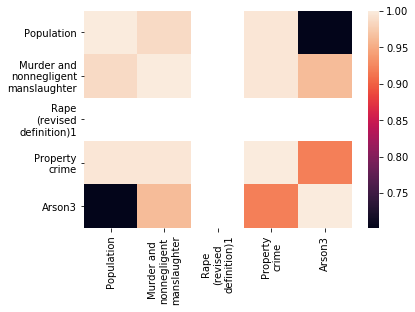

In [163]:
sns.heatmap(raw_crimes.corr())

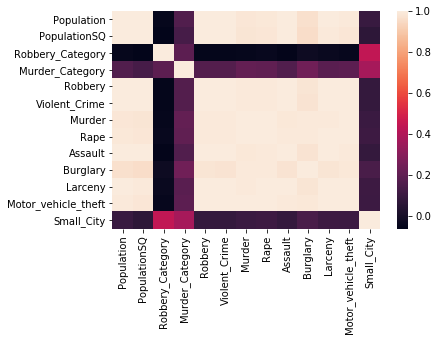

In [164]:
sns.heatmap(Property_Crime.corr())